In [1]:
# This is for the chapter 2 - Supervised Learning
#   Image recognization with Support Vector Machines

In [13]:
%matplotlib inline # the magic line to display image inline for jupyter
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print faces.DESCR

Modified Olivetti faces dataset.

The original database was available from (now defunct)

    http://www.uk.research.att.com/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



In [4]:
# Have a glance of the data
print faces.keys()

['images', 'data', 'target', 'DESCR']


In [5]:
print faces.images.shape

(400, 64, 64)


In [6]:
print faces.data.shape

(400, 4096)


In [7]:
print faces.target.shape

(400,)


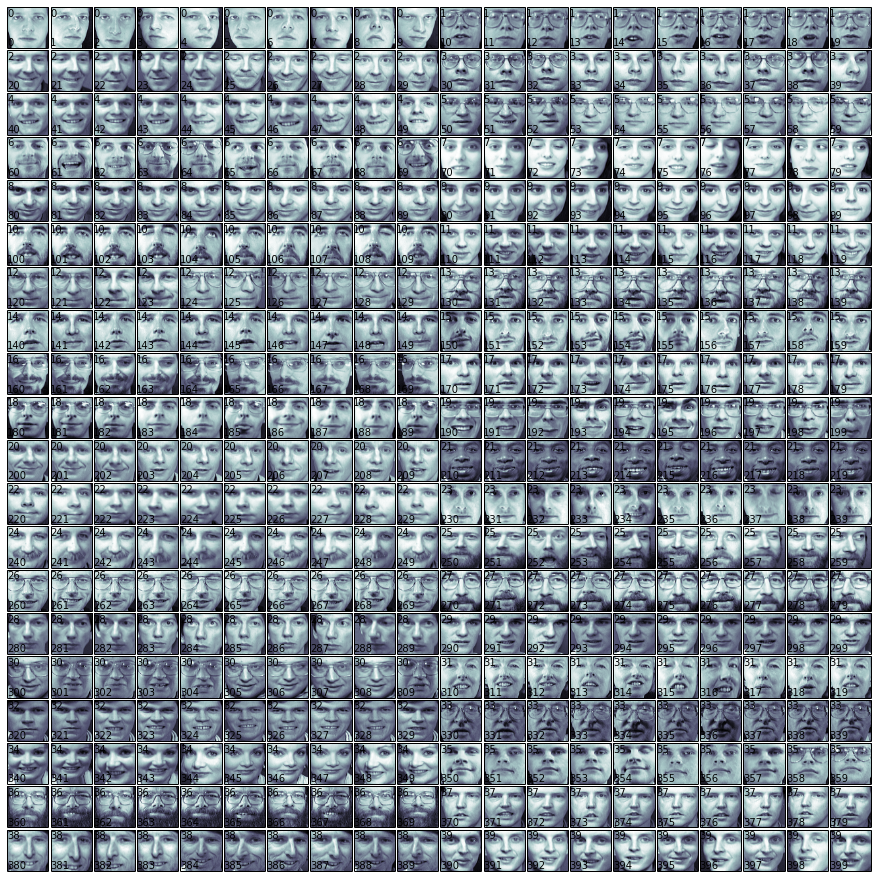

In [32]:
# defeine a helper function, but I am not sure if that works over http connection
def print_faces(images, target, top_n):
    # set up the figure size in inch
    fig = plt.figure(figsize=(12,12))
    fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 1, hspace = 0.05, wspace = 0.05)
    for i in range(top_n):
        p = fig.add_subplot(20, 20, i + 1, xticks = [], yticks = [])
        p.imshow(images[i], cmap = plt.cm.bone)
        # label the figure
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))
print_faces(faces.images, faces.target, 400)        

In [20]:
# Training a support vector machine
# for the 1st classifier, we use linear as kernel function
from sklearn.svm import SVC
svc_1 = SVC(kernel  = 'linear')

In [22]:
# Split the train data set into two parts 1 - actual train data, 2 - test data set (25%)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    faces.data, faces.target, test_size = 0.25, random_state = 0)

In [23]:
# Define the evaluate K-fold cross-validation
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem
def evaluate_cross_valiadtion(clf, X, y, K):
    # create a K-fold cross valiation inerator
    cv = KFold(len(y), K, shuffle = True, random_state = 0)
    # by default, the score used is the one returned by score
    scores = cross_val_score(clf, X, y, cv = cv)
    # print scores
    print "Mean score: {0:.3f} (+/-{1:.3f})".format(np.mean(scores), sem(scores))
evaluate_cross_valiadtion(svc_1, X_train, y_train, 5)

Mean score: 0.913 (+/-0.012)


In [ ]:
# Above result is very good accuracy 0.993 correction

In [29]:
# there are 300 samples with 4096 features
print X_train.shape
print y_train.shape

(300, 4096)
(300,)


In [31]:
# Train the training set and performn on the test set
from sklearn import metrics
def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    print "Accuracy on training set:"
    print clf.score(X_train, y_train)
    print "Accuracy on testing set:"
    print clf.score(X_test, y_test)
    
    y_pred = clf.predict(X_test)
    
    print "Classification Report:"
    print metrics.classification_report(y_test, y_pred)
    print "Confusion Matrix:"
    print metrics.confusion_matrix(y_test, y_pred)

train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
             precision    recall  f1-score   support

          0       0.86      1.00      0.92         6
          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         4
          7       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         5
         15       1.00      1.00      1.00         3
         17       1.00      1.00      1.00         6
         19    

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2641: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)
